In [16]:
# Exemplo 1 – Classificador
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Exemplo 2 – Treinamento
# importa o método load_iris
from sklearn.datasets import load_iris
# importa o modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier

# carrega os dados separando em atributos previsores (X) e alvo (y)
X, y = load_iris(return_X_y=True)

# cria uma instância do modelo de árvore de decisão
model = DecisionTreeClassifier()

# treina o modelo de árvore de decisão
model.fit(X, y)



DecisionTreeClassifier()

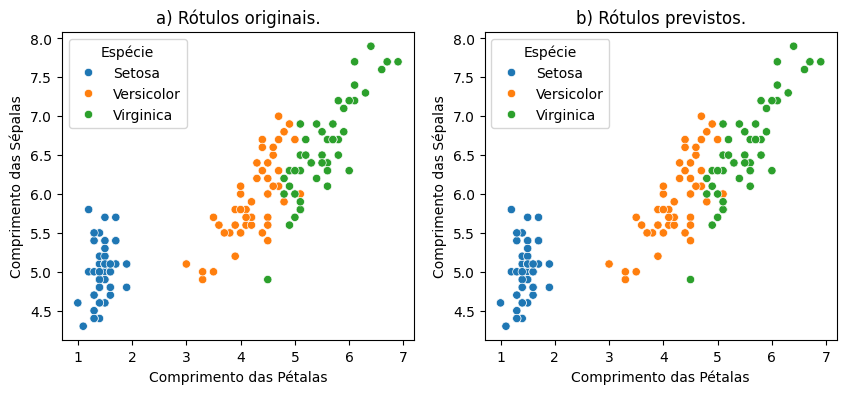

In [17]:
# Exemplo 3 – Previsão, DataFrames e Exibição de Gráficos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame do conjunto original
df = pd.DataFrame(X, columns=['Comprimento das Sépalas',
                               'Largura das Sépalas',
                               'Comprimento das Pétalas',
                               'Largura das Pétalas'])
df['Espécie'] = y
dic = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['Espécie'] = df['Espécie'].apply(lambda i: dic[i])

# Previsão dos rótulos a partir dos atributos previsões
y_preds = model.predict(X)

# DataFrame com os rótulos previstos
df_preds = df.copy()
df_preds['Espécie'] = y_preds
df_preds['Espécie'] = df_preds['Espécie'].apply(lambda i: dic[i])

# Gráficos de distribuição dos dados originais e previstos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(x=df['Comprimento das Pétalas'],
                y=df['Comprimento das Sépalas'],
                hue=df['Espécie'], ax=axes[0])
sns.scatterplot(x=df_preds['Comprimento das Pétalas'],
                y=df_preds['Comprimento das Sépalas'],
                hue=df_preds['Espécie'],
                ax=axes[1])

axes[0].set_title('a) Rótulos originais.')
axes[1].set_title('b) Rótulos previstos.')

plt.show()


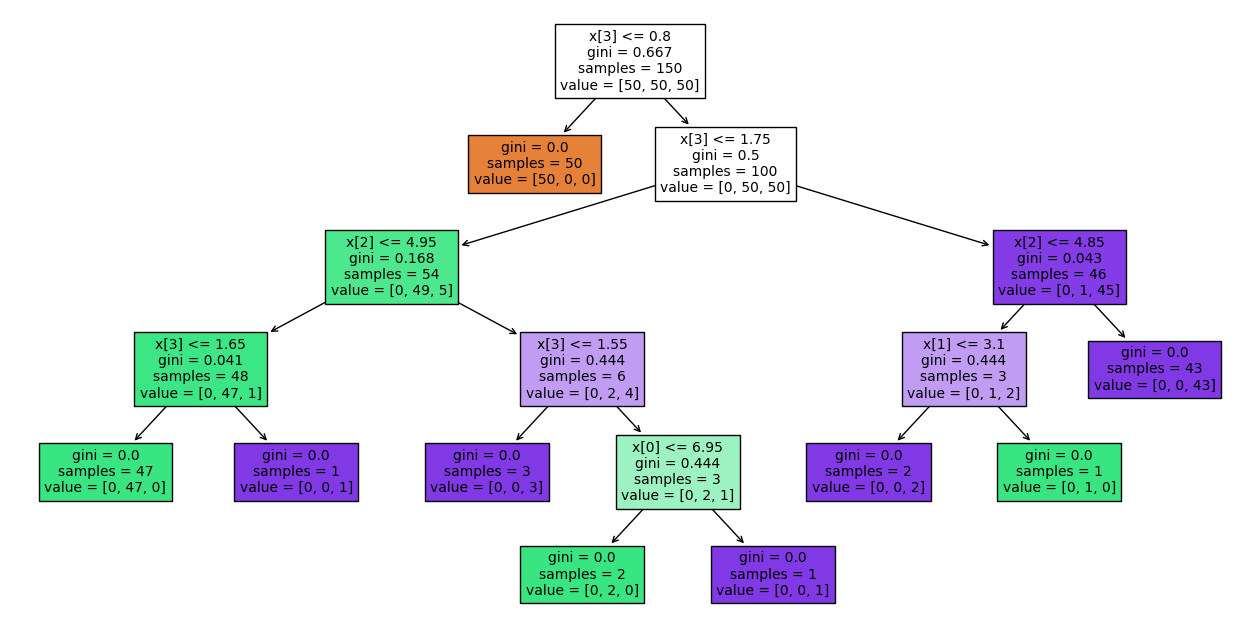

In [18]:
# Exemplo 4 – Plot_tree
# Importa a biblioteca tree
import sklearn.tree
import matplotlib.pyplot as plt

# Cria uma área de gráfico de tamanho específico
fig, ax = plt.subplots(figsize=(16, 8))

# Plota a árvore preenchida pela cor da classe que predomina no nó
arvore = sklearn.tree.plot_tree(model, max_depth=1000, fontsize=10, filled=True, ax=ax)

plt.show()


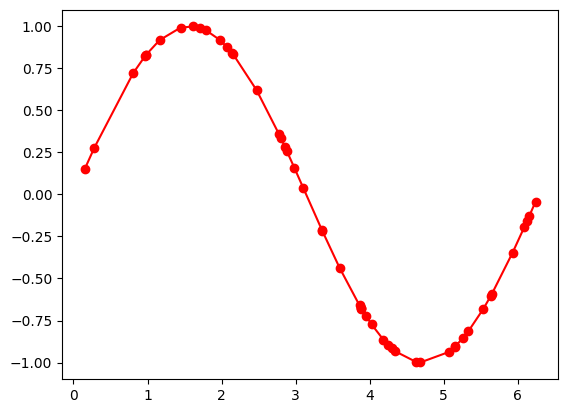

In [19]:
# Exemplo 5 – Senoide
# Importa método de regressão e a biblioteca Numpy
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Cria uma senoide
XR = np.sort(2 * np.pi * np.random.rand(50, 1), axis=0)
yR = np.sin(XR).ravel()

# Plota a senoide destacando as instâncias
plt.plot(XR, yR, 'ro-')
plt.show()


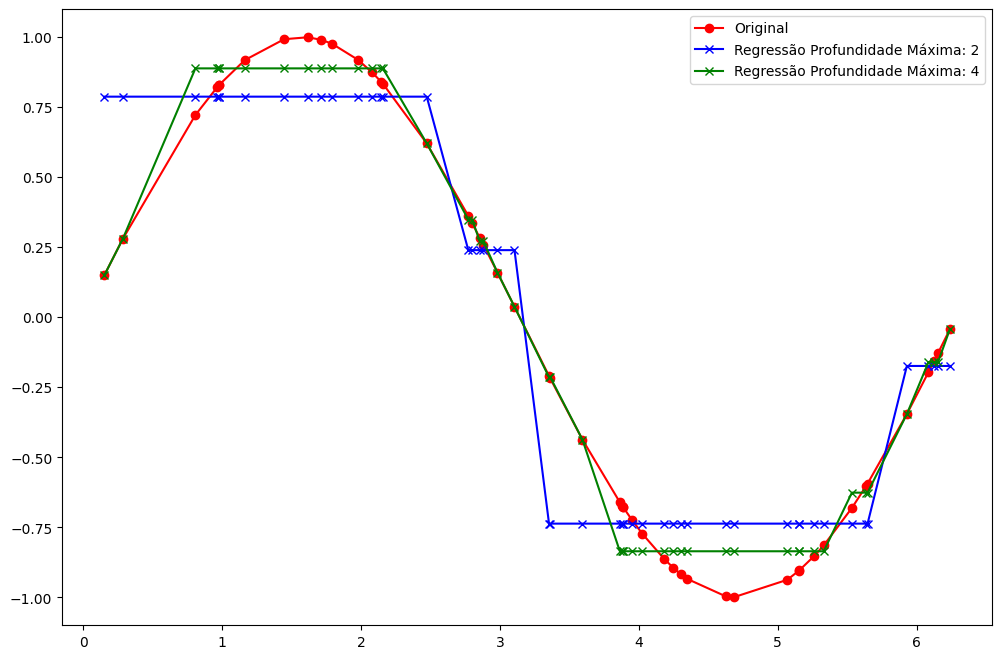

In [20]:
# Exemplo 6 – Treinamento com dois níveis de profundidade diferentes
# e exibição dos resultados.

# Cria um novo modelo
modelR2 = DecisionTreeRegressor(max_depth=2)
modelR4 = DecisionTreeRegressor(max_depth=4)

# Treina o modelo de árvore de decisão
modelR2.fit(X=XR, y=yR)
modelR4.fit(X=XR, y=yR)

# Previsão dos rótulos a partir dos atributos previsões
yR2_prevs = modelR2.predict(XR)
yR4_prevs = modelR4.predict(XR)

# Plot dos resultados
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(XR, yR, 'ro-', label='Original')
plt.plot(XR, yR2_prevs, 'bx-', label='Regressão Profundidade Máxima: 2')
plt.plot(XR, yR4_prevs, 'gx-', label='Regressão Profundidade Máxima: 4')
plt.legend()
plt.show()


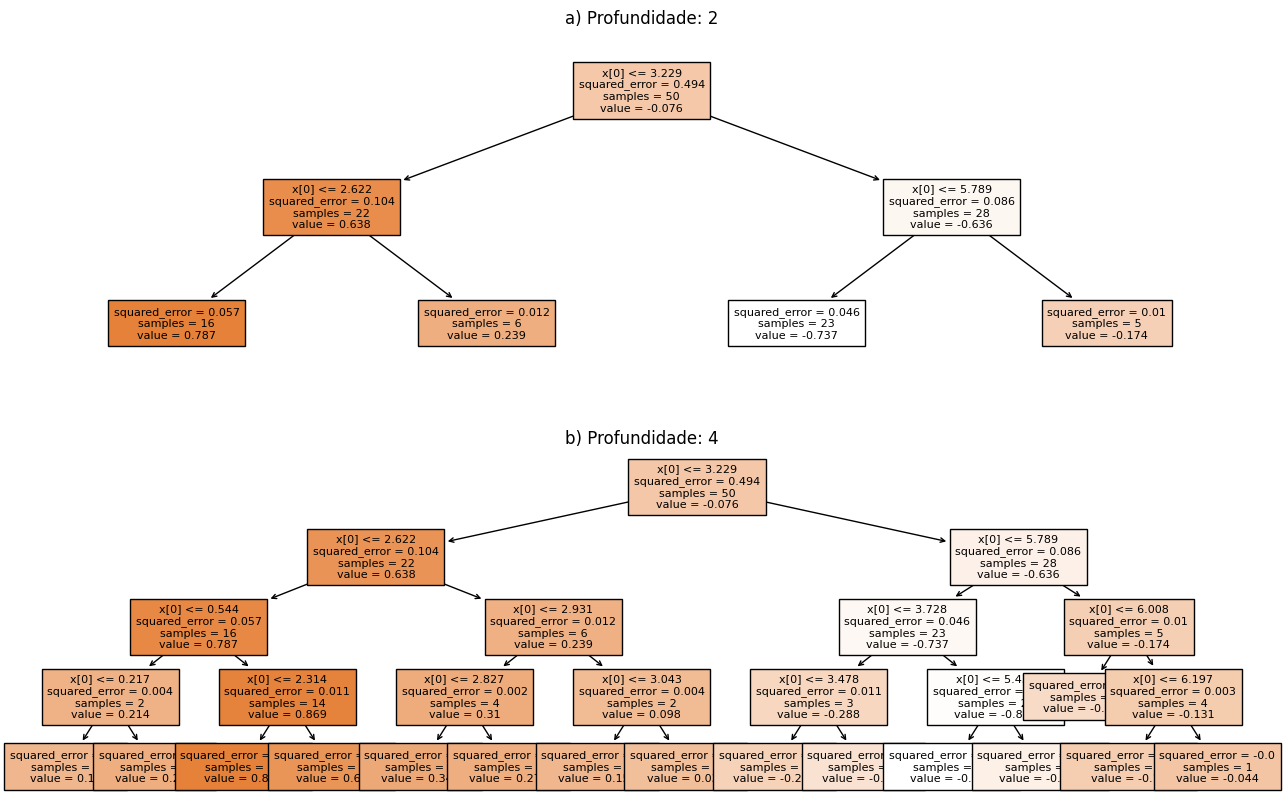

In [21]:
# Exemplo 7 – Árvores de Regressão
fig, ax = plt.subplots(2, 1, figsize=(16, 10))

arvoreR2 = sklearn.tree.plot_tree(modelR2, fontsize=8, filled=True, ax=ax[0])
arvoreR4 = sklearn.tree.plot_tree(modelR4, fontsize=8, filled=True, ax=ax[1])

ax[0].set_title('a) Profundidade: 2')
ax[1].set_title('b) Profundidade: 4')

plt.show()


In [22]:
# Exemplo 8 – Hold-out
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

Xh, yh = load_iris(return_X_y=True)
acc = []
tt = np.arange(0.1, 1, 0.1)

for t in tt:
    X_treino, X_teste, y_treino, y_teste = train_test_split(Xh, yh, test_size=t, random_state=4)
    modelh = DecisionTreeClassifier(random_state=4)
    modelh.fit(X=X_treino, y=y_treino)
    acc.append(accuracy_score(y_teste, modelh.predict(X_teste)) * 100)

pd.DataFrame(acc, index=tt * 100, columns=['Acurácia'])


,Acurácia
10.0,93.333333
20.0,96.666667
30.0,97.826087
40.0,96.666667
50.0,93.333333
60.0,93.333333
70.0,96.226415
80.0,97.500000
90.0,94.074074


In [23]:
# Exemplo 9 – Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

Xc, yc = load_iris(return_X_y=True)
acc = []
dfc = pd.DataFrame()

for r in range(1, 5, 1):
    modelc = DecisionTreeClassifier(random_state=r)
    s = 'Acurácia R' + str(r)
    cross = cross_val_score(modelc, Xc, yc, cv=10, scoring='accuracy') * 100
    cross = np.append(cross, np.mean(cross))
    dfc[s] = cross

dfc


,Acurácia R1,Acurácia R2,Acurácia R3,Acurácia R4
0,100.000000,100.000000,100.000000,100.000000
1,93.333333,93.333333,93.333333,93.333333
2,100.000000,100.000000,100.000000,100.000000
3,93.333333,93.333333,93.333333,93.333333
4,93.333333,93.333333,93.333333,93.333333
5,86.666667,86.666667,86.666667,86.666667
6,93.333333,93.333333,93.333333,93.333333
7,93.333333,100.000000,100.000000,100.000000
8,100.000000,100.000000,100.000000,100.000000
9,100.000000,100.000000,100.000000,100.000000


In [24]:
# Exemplo 10 – Erro Quadrático Médio (MSE, Mean Squared Error)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

Xh = np.sort(2 * np.pi * np.random.rand(50, 1), axis=0)
yh = np.sin(Xh).ravel()
mse = []
tt = np.arange(0.1, 1, 0.1)

for t in tt:
    X_treino, X_teste, y_treino, y_teste = train_test_split(Xh, yh, test_size=t, random_state=4)
    modelh = DecisionTreeRegressor(random_state=4)
    modelh.fit(X=X_treino, y=y_treino)
    mse.append(mean_squared_error(y_teste, modelh.predict(X_teste)) * 100)

pd.DataFrame(mse, index=tt * 100, columns=['MSE'])


,MSE
10.0,0.069429
20.0,0.095249
30.0,0.198604
40.0,1.030919
50.0,1.385557
60.0,6.578550
70.0,5.670836
80.0,6.020235
90.0,16.514304


In [25]:
# Exemplo 11 – CV - Erro Quadrático Médio (MSE, Mean Squared Error)
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

Xc = np.sort(2 * np.pi * np.random.rand(50, 1), axis=0)
yc = np.sin(Xc).ravel()
dfc = pd.DataFrame()

for d in range(2, 10, 1):
    modelc = DecisionTreeRegressor(max_depth=d)
    s = 'MSE D=' + str(d)
    cross = cross_val_score(modelc, Xc, yc, cv=10, scoring='neg_mean_squared_error') * 100
    cross = np.append(cross, np.mean(cross))
    dfc[s] = cross

dfc


,MSE D=2,MSE D=3,MSE D=4,MSE D=5,MSE D=6,MSE D=7,MSE D=8,MSE D=9
0,-34.729934,-13.391678,-13.391678,-13.391678,-13.391678,-13.391678,-13.391678,-13.391678
1,-1.954369,-1.179525,-1.493212,-0.958682,-0.985820,-0.996788,-0.983315,-0.983315
2,-9.287462,-3.511530,-1.715309,-0.785419,-0.241225,-0.129899,-0.095115,-0.043553
3,-1.055057,-0.443486,-0.582873,-1.375195,-0.972283,-1.004112,-1.006535,-1.003772
4,-33.746431,-16.956180,-7.754225,-5.517909,-5.378906,-5.378906,-5.378906,-5.378906
5,-20.192617,-11.818477,-8.507556,-7.105914,-6.475171,-6.475171,-6.475171,-6.475171
6,-3.015926,-0.204689,-1.217940,-1.604906,-2.333717,-0.889034,-0.889034,-0.889034
7,-20.910380,-10.415311,-6.224962,-3.478907,-2.221494,-1.780173,-1.269783,-0.872328
8,-11.411091,-6.687589,-3.531832,-3.540408,-3.550462,-3.554860,-3.554373,-3.554373
9,-35.174834,-6.681122,-3.792858,-3.792858,-3.792858,-3.792858,-3.792858,-3.792858
